In [1]:
#NguyenHongDuc_21027171
#Features -> Log Transformation -> MinMaxScale -> Polynomial degree = 2 -> LR model -> Target
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a DataFrame named 'df'
df = pd.read_csv('boston.csv', header=0, delimiter=',', encoding='utf-8')
df = df.iloc[:300]

# Assuming your data is in a variable named 'df'
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target variable (last column)

# Chia tách ra trainning (huấn luyện) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [2]:
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289.0,16.0,396.90,6.27,28.6
296,0.05372,0.0,13.92,0,0.437,6.549,51.0,5.9604,4,289.0,16.0,392.85,7.39,27.1
297,0.14103,0.0,13.92,0,0.437,5.790,58.0,6.3200,4,289.0,16.0,396.90,15.84,20.3
298,0.06466,70.0,2.24,0,0.400,6.345,20.1,7.8278,5,358.0,14.8,368.24,4.97,22.5


In [3]:
#Features -> Log Transformation -> MinMaxScale -> Polynomial degree = 2 -> LR model -> Target
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

steps = [ ('log_transform', FunctionTransformer(np.log1p)),  # Log Transformation
          ('minmax_scale', MinMaxScaler()),  # Chuẩn hóa dữ liệu theo Min-Max Scaling
          ('poly_features', PolynomialFeatures(degree=2)),
          ('modelLR',LinearRegression())]

In [4]:
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('log_transform', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('minmax_scale', MinMaxScaler()),
                ('poly_features', PolynomialFeatures()),
                ('modelLR', LinearRegression())])

In [5]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('log_transform', FunctionTransformer(func=<ufunc 'log1p'>)),
                ('minmax_scale', MinMaxScaler()),
                ('poly_features', PolynomialFeatures()),
                ('modelLR', LinearRegression())])

In [6]:
# Đánh giá mô hình
import numpy as np
from sklearn import metrics

y_train_pred = pipe.predict(X_train)

print('Score or R-Squared:',pipe.score(X_train,y_train))

print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_train_pred))

print('Mean Squared Error:',metrics.mean_squared_error(y_train,y_train_pred))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(y_train,y_train_pred))

Score or R-Squared: 0.9737438424962188
Mean Absolute Error: 1.1597395833333333
Mean Squared Error: 2.2570201009114585
Root Mean Squared Error: 1.5023382112265729
Mean Absolute Percentage Error: 0.04779254927422912


In [7]:
# Đánh giá mô hình
import numpy as np
from sklearn import metrics

y_test_pred = pipe.predict(X_test)

print('Score or R-Squared:',pipe.score(X_test,y_test))

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_test_pred))

print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_pred))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(y_test,y_test_pred))


Score or R-Squared: 0.8113917864415405
Mean Absolute Error: 1.9927604166666664
Mean Squared Error: 8.471217936197919
Root Mean Squared Error: 2.9105356785646723
Mean Absolute Percentage Error: 0.0949241665646056


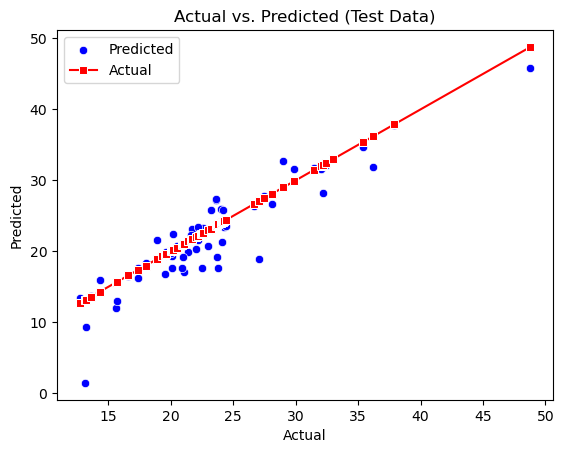

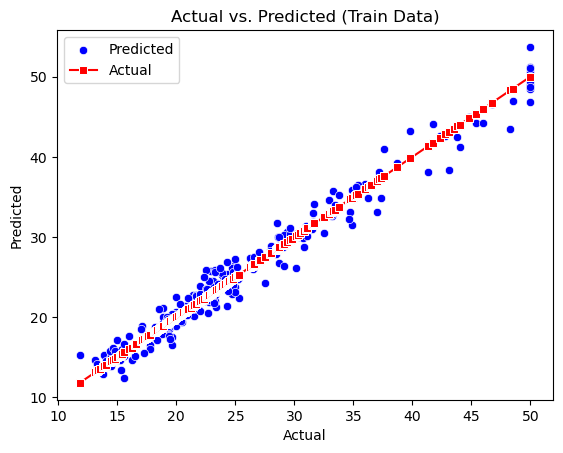

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Actual-Predicted Plot cho tập kiểm thử
sns.scatterplot(x=y_test.to_numpy().flatten(), y=y_test_pred.flatten(), marker='o', color='b', label='Predicted')
sns.lineplot(x=y_test.to_numpy().flatten(), y=y_test.to_numpy().flatten(), marker='s', color='r', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Test Data)')
plt.legend()
plt.show()

# Actual-Predicted Plot cho tập huấn luyện
sns.scatterplot(x=y_train.to_numpy().flatten(), y=y_train_pred.flatten(), marker='o', color='b', label='Predicted')
sns.lineplot(x=y_train.to_numpy().flatten(), y=y_train.to_numpy().flatten(), marker='s', color='r', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted (Train Data)')
plt.legend()
plt.show()


In [9]:
y_test_pred = pipe.predict(X_test)
dfTestValidation = pd.DataFrame({
    'y_test': y_test,
    'y_test_pred': y_test_pred,
    'Residual': y_test - y_test_pred
})

dfTestValidation.head()

,y_test,y_test_pred,Residual
281,35.4,34.671875,0.728125
167,23.8,17.656250,6.143750
0,24.0,25.968750,-1.968750
214,23.7,19.218750,4.481250
88,23.6,27.203125,-3.603125


In [10]:
y_train_pred = pipe.predict(X_train)

dfTrainValidation = pd.DataFrame({
    'y_train': y_train,
    'y_train_pred': y_train_pred,
    'Residual': y_train - y_train_pred
})
dfTrainValidation.head()

,y_train,y_train_pred,Residual
188,29.8,29.898438,-0.098437
135,18.1,17.546875,0.553125
250,24.4,25.335938,-0.935938
245,18.5,17.804688,0.695312
179,37.2,38.140625,-0.940625


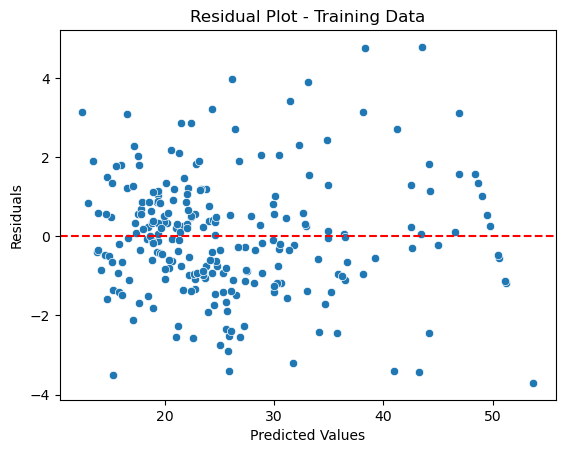

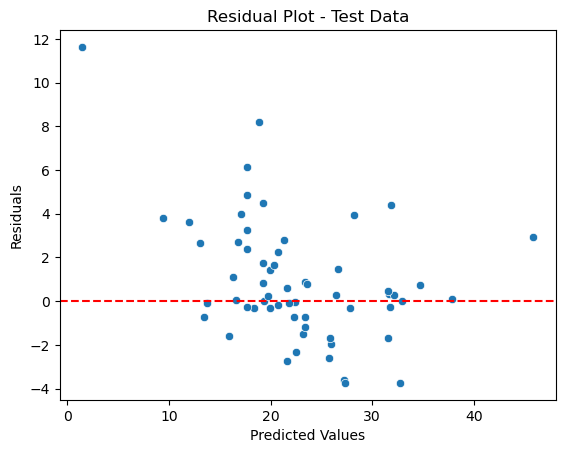

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo Residual Plot cho tập huấn luyện bằng seaborn
sns.scatterplot(x=y_train_pred, y=dfTrainValidation['Residual'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Training Data')
plt.show()
# Tạo Residual Plot cho tập kiểm thử bằng seaborn
sns.scatterplot(x=y_test_pred, y=dfTestValidation['Residual'])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot - Test Data')
plt.show()

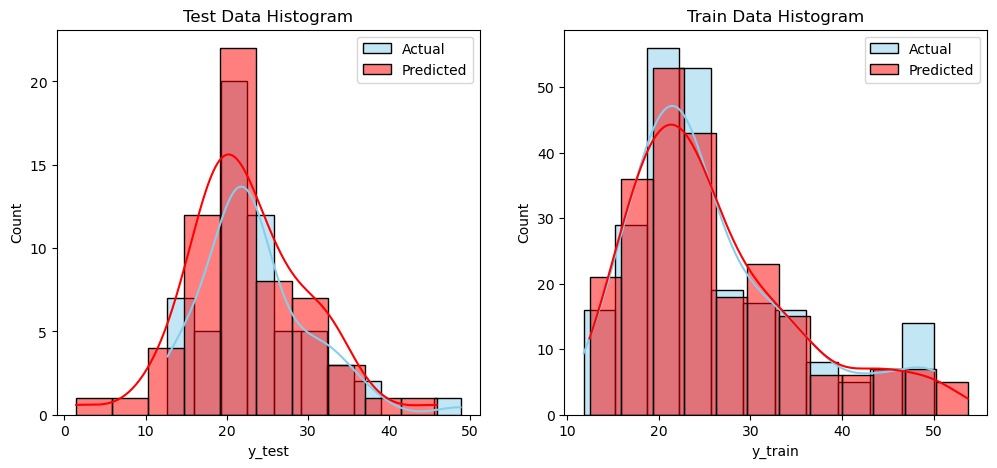

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo histogram cho tập huấn luyện và tập kiểm thử
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram cho Actual và Predicted trong tập kiểm thử
sns.histplot(data=dfTestValidation, x='y_test', color='skyblue', label='Actual', kde=True, ax=axes[0])
sns.histplot(data=dfTestValidation, x='y_test_pred', color='red', label='Predicted', kde=True, ax=axes[0])
axes[0].set_title('Test Data Histogram')

# Histogram cho Actual và Predicted trong tập huấn luyện
sns.histplot(data=dfTrainValidation, x='y_train', color='skyblue', label='Actual', kde=True, ax=axes[1])
sns.histplot(data=dfTrainValidation, x='y_train_pred', color='red', label='Predicted', kde=True, ax=axes[1])
axes[1].set_title('Train Data Histogram')

for ax in axes:
    ax.legend()

plt.show()
